# Python examples in lecture 7
* This file is a jupyter notebook. To run it you can download it from the DLE and run it on your own machine.
* Or you can run it on google collab <https://colab.research.google.com> via your google account. This may be slower than running on your own machine


##  Creating a pandas dataframe

I have shown you how to load a csv file into a pandas dataframe

Creating Pandas Dataframe from lists of lists.


In [3]:
import pandas as pd 
data = [['Tom', 23], ['Nick', 35], ['Jane', 24]] 
#print(data[1])
df = pd.DataFrame(data, columns = ['Name', 'Age']) 
print(df)

   Name  Age
0   Tom   23
1  Nick   35
2  Jane   24


##  Creating a pandas dataframe

Creating Pandas Dataframe from list of dictionaries

In [8]:
import pandas as pd 
dict1 = {'a': 1, 'b': 2, 'c':3}
dict2 =  {'a':10, 'b': 20, 'c': 30}  
#print(dict1["c"])
data = [ dict1, dict2 ]
#print(data[0])
df = pd.DataFrame(data) 
print(df)


    a   b   c
0   1   2   3
1  10  20  30


##  Extracting variables from pandas dataframe

We need to be able to get information out of the dataframe

* **df['Age']**  where Age is a column name
* **df.iloc[1,1]** element in first row and first column
* **df.loc[1,'Age']** element in first row and first column=Age
* **df['Age'].to\_numpy()** extract a column to numpy array

Note the difference between **iloc** and **loc**.


In [15]:
import pandas as pd 
data = [['Tom', 23], ['Nick', 35], ['Jane', 24]] 
df = pd.DataFrame(data, columns = ['Name', 'Age']) 
print(df)
#print("df.iloc[0,0] = " , df.iloc[0,0])
#print("df.loc[1,Age] = " , df.loc[1,'Age'])
print("df['Age'].to_numpy() = " , df['Age'].to_numpy())

   Name  Age
0   Tom   23
1  Nick   35
2  Jane   24
df['Age'].to_numpy() =  [23 35 24]


##  Changing numbers in a pandas dataframe

In [17]:
import pandas as pd 
data = [['Tom', 23], ['Nick', 35], ['Jane', 24]] 
df = pd.DataFrame(data, columns = ['Name', 'Age']) 
df.iloc[1,1] = 56
print(df)


   Name  Age
0   Tom   23
1  Nick   56
2  Jane   24


##  Deleting columns from pandas data frame

* To remove a column from the dataframe use **drop**

* The example blow deletes columns: pop and gdpPercap

In [19]:
import pandas as pd
gapminder_url='https://bit.ly/2cLzoxH'
gapminder = pd.read_csv(gapminder_url)
print(gapminder.head(3))
# pandas drop a column with drop function
gapminder.drop(['pop', 'gdpPercap'],axis=1,inplace=True)
print("------------------------------")
print(gapminder.head(3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
------------------------------
       country  year continent  lifeExp
0  Afghanistan  1952      Asia   28.801
1  Afghanistan  1957      Asia   30.332
2  Afghanistan  1962      Asia   31.997


## Missing values in datasets

* Many large data sets have missing values.
* Why?  Mistakes, bugs in software.

<pre>
Name,Age,Sex
John, 22, Male
Jane, 25, Female
Roger,, Male
Karen,21, Female
</pre>

Roger's age is missing


##  Dealing with missing values
* NaN is a missing value in pandas

In [6]:
import pandas as pd
df = pd.read_csv("peopleBad.csv")
print(df)
print("sum of ages = " , df['Age'].sum())


    Name   Age      Sex
0   John  22.0     Male
1   Jane  25.0   Female
2  Roger   NaN     Male
3  Karen  21.0   Female
sum of ages =  68.0


##  Options for dealing with missing values

Remove all the missing values. This is a safe option.
However the size of the data set is
  then smaller.

* Set the missing values to 0.

* Set the missing values to the mean value of the column.

* Set the value to the value above in the row above

## Remove the missing values

* Remove NaN's from the loaded data using **dropna**
* Remove Roger row  because of missing age.
* We have lost 25% of the data set

In [23]:
import pandas as pd
df = pd.read_csv("peopleBad.csv")
#df.dropna(inplace=True)
dfA = df.dropna()
print(dfA)

    Name   Age      Sex
0   John  22.0     Male
1   Jane  25.0   Female
3  Karen  21.0   Female


##  Set the missing values to a constant

*  Age of Roger set to 22
* Could also set Roger's age to mean age.

In [26]:
import pandas as pd
df = pd.read_csv("peopleBad.csv")
x = df["Age"].mean()
print("mean = " , x)
df.fillna(df["Age"].mean(), inplace=True)
print(df)


mean =  22.666666666666668
    Name        Age      Sex
0   John  22.000000     Male
1   Jane  25.000000   Female
2  Roger  22.666667     Male
3  Karen  21.000000   Female


## Other options


In [20]:
import pandas as pd
df = pd.read_csv("peopleBad.csv")
df.fillna(method='ffill', inplace=True)
print(df)

    Name   Age      Sex
0   John  22.0     Male
1   Jane  25.0   Female
2  Roger  25.0     Male
3  Karen  21.0   Female


/tmp/ipykernel_31836/1653318700.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## Comments on data cleaning

The cleaned data will be loaded into a machine learning algorthim or visualization dashborad.

* Additional techniques can be used to deal with missing data, such as linear regression or clustering (see modules in the second semester.) 
* Even more sophisticated techniques such as neural networks can be used: https://www.sciencedirect.com/science/article/abs/pii/S0020025522001931  Handling missing data through deep convolutional neural network
* It could be that the data cleaning introduces patterns that change the results of the machine learning. 

You may need to run some experiments with the machne learning to test the cleaning. 

##  Pandas summary functions

There are many useful functions to summarize the data.

In [29]:
import pandas as pd

data = {'Gender':['m','f','f','m','f','m','m'],
        'Height':[172,171,169,173,170,175,178]}
df = pd.DataFrame(data)
print(df)

#print(df.groupby('Gender').count())
print(df.groupby('Gender')['Height'].mean())

  Gender  Height
0      m     172
1      f     171
2      f     169
3      m     173
4      f     170
5      m     175
6      m     178
Gender
f    170.0
m    174.5
Name: Height, dtype: float64


##  Sorting a dataframe

In [32]:
import pandas as pd

data = {'Gender':['m','f','f','m','f','m','m'],
   'Height':[172,171,169,173,170,175,178]}
df = pd.DataFrame(data)
print(df)

# sorting data frame by name
df.sort_values("Height", ascending = True,
                 inplace = True)
print("Sorted values")
print(df)


  Gender  Height
0      m     172
1      f     171
2      f     169
3      m     173
4      f     170
5      m     175
6      m     178
Sorted values
  Gender  Height
2      f     169
4      f     170
1      f     171
0      m     172
3      m     173
5      m     175
6      m     178


We can update the index

In [33]:
df.reset_index(inplace = True)
df.drop(['index' ],axis=1,inplace=True)
print(df)

  Gender  Height
0      f     169
1      f     170
2      f     171
3      m     172
4      m     173
5      m     175
6      m     178


## Plotting from pandas


* One way to plot data from pandas would be to extract the data into a list and then plot it using a python library.

* Data in a pandas dataframe can be plotted directly.

* Many different types of plots are available:  scatter, histogram

* The plotting routines uses the matplotlib library.

* I find the pandas plotting routines a bit ugly.


More information at
https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html

# Plotting from pandas

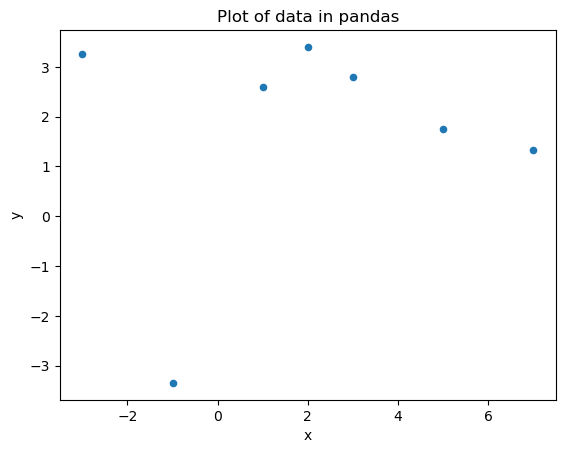

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

df = pd.DataFrame({'x': [1,2,-3,3,5,7,-1],
                   'y' : [2.6,3.4,3.25,2.8,
                   1.75,1.34,-3.345]})
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_html.html
#print(df)
#display(HTML(df.to_html(index=False)))
df.plot(x='x', y='y', kind='scatter')
plt.title("Plot of data in pandas")
#plt.savefig("pandas.png")
plt.show()


## SQL select examples

The following cells contain the different SQL selectn examples shown in the lectures. The examples need the
followig filess (available on the DLE)

*  student_record.db
*  house.db
*  enrolment.db


In [15]:
#   SQL_grades_one.py

import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT ALL last FROM student ") 
result = cursor.fetchall() 
for r in result:
    print(r)

OperationalError: no such table: student

In [27]:
#  SQL_grades_two.py

import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT DISTINCT last FROM student ") 
result = cursor.fetchall() 
for r in result:
    print(r)


('Smith',)
('Jones',)
('Brown',)


In [13]:
# SQL_grades_three.py
import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM grade WHERE mark >= 60 ") 
result = cursor.fetchall() 
for r in result:
    print(r)

('S103', 'DBS', 72)
('S104', 'PR1', 68)
('S104', 'IAI', 65)
('S107', 'PR1', 76)
('S107', 'PR2', 60)


In [17]:
#  SQL_grades_four.py

import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT DISTINCT ID FROM grade WHERE mark >= 60") 
result = cursor.fetchall() 
for r in result:
    print(r)


('S103',)
('S104',)
('S107',)


In [18]:
##  SQL_grades_mult.py


import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT first, last, mark FROM student, grade WHERE (student.id = grade.id) AND (mark > 60) ") 
result = cursor.fetchall() 
for r in result:
    print(r)


('John', 'Smith', 72)
('Mary', 'Jones', 68)
('Mary', 'Jones', 65)
('John', 'Brown', 76)


In [21]:
#  SQL_grades_mult_one.py


import sqlite3
connection = sqlite3.connect("student_record.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM student, grade, modules WHERE student.id = grade.id AND modules.code = grade.code")
result = cursor.fetchall() 
for r in result:
    print(r)

('S103', 'John', 'Smith', 'S103', 'DBS', 72, 'DBS', 'Database Systems')
('S103', 'John', 'Smith', 'S103', 'IAI', 58, 'IAI', 'Intro to AI')
('S104', 'Mary', 'Jones', 'S104', 'PR1', 68, 'PR1', 'Programming 1')
('S104', 'Mary', 'Jones', 'S104', 'IAI', 65, 'IAI', 'Intro to AI')
('S106', 'Mark', 'Jones', 'S106', 'PR2', 43, 'PR2', 'Programming 2')
('S107', 'John', 'Brown', 'S107', 'PR1', 76, 'PR1', 'Programming 1')
('S107', 'John', 'Brown', 'S107', 'PR2', 60, 'PR2', 'Programming 2')
('S107', 'John', 'Brown', 'S107', 'IAI', 35, 'IAI', 'Intro to AI')


In [22]:
#  SQL_enrolment_one.py

import sqlite3
connection = sqlite3.connect("enrolment.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM student CROSS JOIN enrolment")
result = cursor.fetchall() 
for r in result:
    print(r)


('123', 'John', '123', 'DBS')
('123', 'John', '124', 'PRG')
('123', 'John', '124', 'DBS')
('123', 'John', '126', 'PRG')
('124', 'Mary', '123', 'DBS')
('124', 'Mary', '124', 'PRG')
('124', 'Mary', '124', 'DBS')
('124', 'Mary', '126', 'PRG')
('125', 'Mark', '123', 'DBS')
('125', 'Mark', '124', 'PRG')
('125', 'Mark', '124', 'DBS')
('125', 'Mark', '126', 'PRG')
('126', 'Jane', '123', 'DBS')
('126', 'Jane', '124', 'PRG')
('126', 'Jane', '124', 'DBS')
('126', 'Jane', '126', 'PRG')


In [23]:
#  SQL_enrolment_two.py

import sqlite3
connection = sqlite3.connect("enrolment.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM student NATURAL JOIN enrolment")
result = cursor.fetchall() 
for r in result:
    print(r)

('123', 'John', 'DBS')
('124', 'Mary', 'PRG')
('124', 'Mary', 'DBS')
('126', 'Jane', 'PRG')


In [24]:
#   SQL_enrolment_three.py

import sqlite3
connection = sqlite3.connect("enrolment.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM Student INNER JOIN Enrolment USING (ID)")
result = cursor.fetchall() 
for r in result:
    print(r)




('123', 'John', 'DBS')
('124', 'Mary', 'PRG')
('124', 'Mary', 'DBS')
('126', 'Jane', 'PRG')


In [26]:
#   SQL_house_one.py

import sqlite3
connection = sqlite3.connect("house.db")
cursor = connection.cursor()
cursor.execute("SELECT * FROM buyer INNER JOIN property ON price <= budget")
result = cursor.fetchall() 
for r in result:
    print(r)


('Smith', 100000, '15 High St', 85000)
('Jones', 150000, '15 High St', 85000)
('Jones', 150000, '12 Queen St', 125000)
